In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
from mytorch.models import VGG16

model = VGG16(pretrained=True)

x = np.random.randn(1, 3, 224, 224).astype(np.float32)
model.plot(x)

In [3]:
!apt-get update -y
!apt-get install -y graphviz
!dot /root/.mytorch/tmp_graph.dot -T png -o /root/.mytorch/graph.png

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease              
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


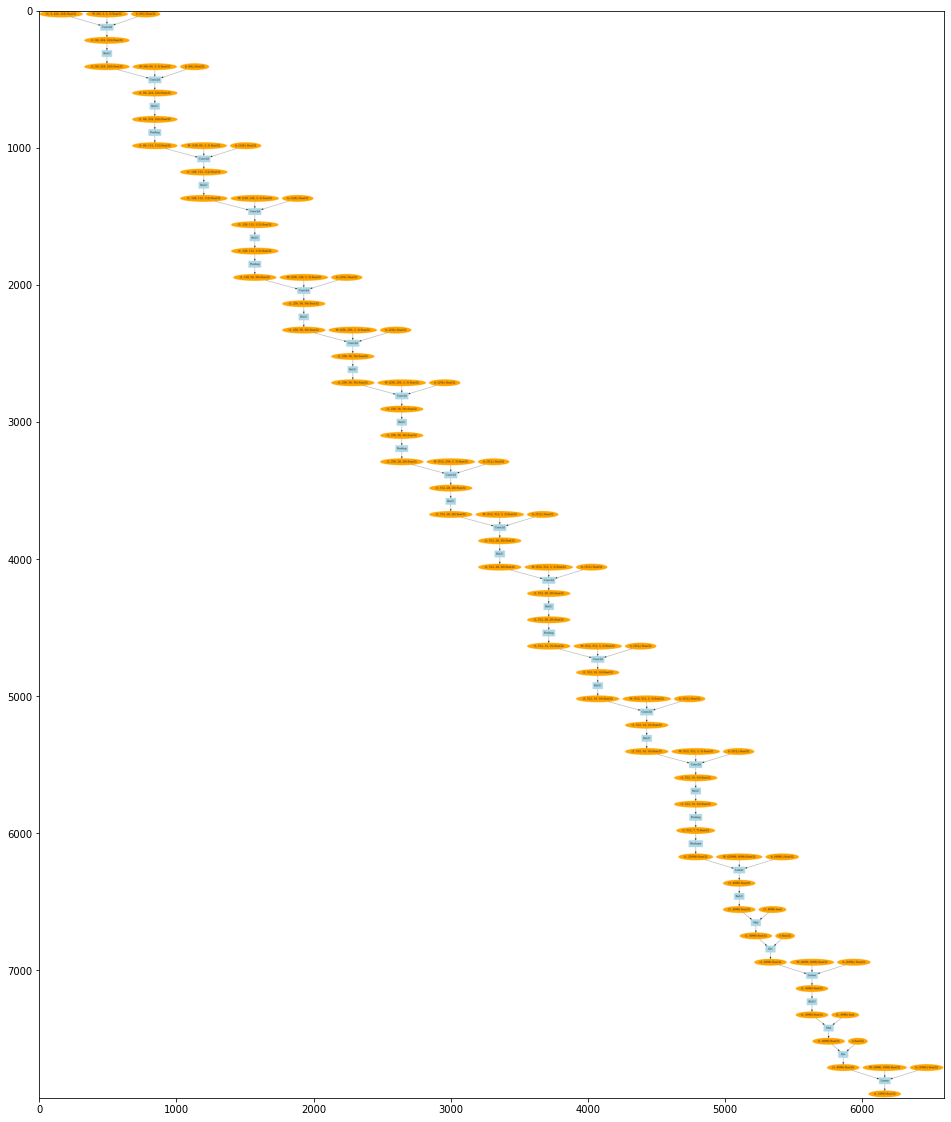

In [4]:

import matplotlib.pyplot as plt
img = plt.imread('/root/.mytorch/graph.png')
plt.figure(figsize=(20, 20))
plt.imshow(img)

In [5]:
!pip install ipywidgets

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [6]:
from ipywidgets import FileUpload
from IPython.display import display
upload = FileUpload(accept='.jpg')
display(upload)

FileUpload(value={}, accept='.jpg', description='Upload')

image : zebra.jpg


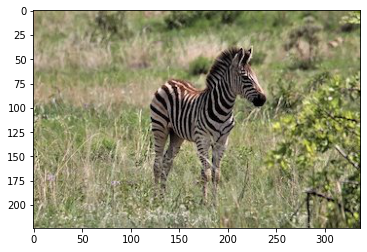

In [9]:
import io
import matplotlib.image as mpimg
from PIL import Image
for key, value in upload.value.items():
    print(f"image : {key}")
    fp = io.BytesIO(value['content'])
    with fp:
        img = Image.open(io.BytesIO(value['content']))
    plt.imshow(np.array(img))
    


In [13]:
import mytorch
model = VGG16(pretrained=True)

In [14]:
for key, value in upload.value.items():
    print(f"image : {key}")
    fp = io.BytesIO(value['content'])
    with fp:
        img = Image.open(io.BytesIO(value['content']))
    x = VGG16.preprocess(img)
    x = x[np.newaxis]
    with mytorch.test_mode():
        y = model(x)
    predict_id = np.argmax(y.data)
    
    labels = mytorch.datasets.ImageNet.labels()
    print(labels[predict_id])

image : zebra.jpg
zebra
